<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [214]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

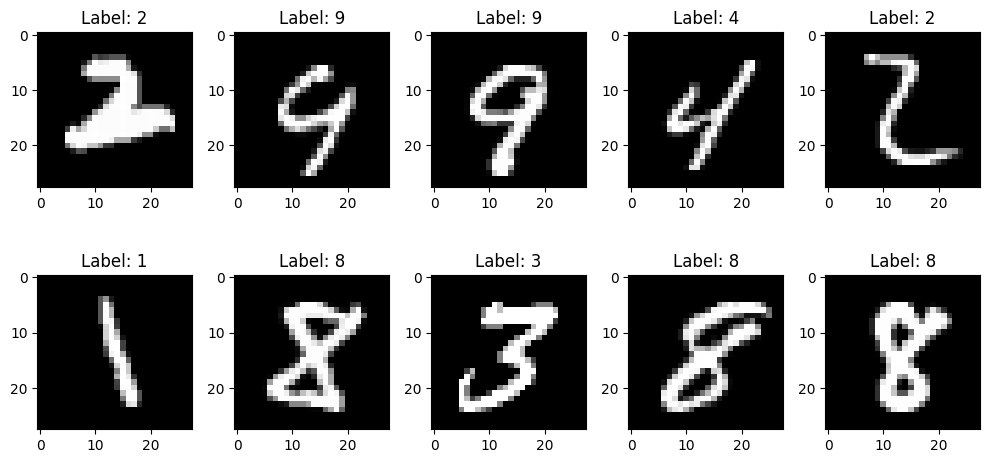

In [215]:
num_row, num_col = 2, 5

idx_10 = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,)) # subset 10 figures
x_train_10, y_train_10 = x_train[idx_10], y_train[idx_10]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_10[i])))
    ax.imshow(x_train_10[i], cmap='gray')
plt.tight_layout()
plt.show()

In [324]:
x_train_sampled = x_train[:1000]
x_test_sampled = x_test[:250]
label_train_sampled = label_train[:1000]
label_test_sampled = label_test[:250]

num_filter_1st = 5
num_filter_2nd = 10
iter = 1000

In [331]:
mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter_1st,
                     kernel_size = (3,3),
                     padding = 'same',
                     strides=1,
                     bias_initializer=Constant(0.2),
                     activation="relu",
                     input_shape = (28,28,1)))
mnist_cnn.add(MaxPool2D(pool_size=(2,2)))
mnist_cnn.add(Conv2D(filters = num_filter_2nd,
                     kernel_size = (2,2),
                     padding = 'Same',
                     strides=1,
                     activation ='relu'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])
mnist_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)                   │ (None, 28, 28, 5)           │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 14, 14, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 14, 14, 10)          │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 13, 13, 10)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260 (1.02 KB)

 Trainable params: 260 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_pred = mnist_cnn.predict(x_train_sampled, batch_size=None, verbose="1", steps=iter, callbacks=None)
y_pred = mnist_cnn.predict_classes(x_pred, axis=1)

In [346]:
y_pred[9]

array([ 4,  0,  0,  0,  4,  4,  1,  6, 12,  0])

array([[0.00589178, 0.03154859, 0.05663725, 0.05663725, 0.05777264,
        0.05777264, 0.01209855, 0.00589178, 0.00589178, 0.00589178,
        0.00589178, 0.00589178, 0.1596234 ],
       [0.00589178, 0.11259629, 0.11291169, 0.21212648, 0.21212648,
        0.19457899, 0.19457899, 0.14300452, 0.02453539, 0.00613509,
        0.00589178, 0.00589178, 0.1596234 ],
       [0.00589178, 0.11259629, 0.24507424, 0.24507424, 0.24146853,
        0.19457899, 0.19457899, 0.14300452, 0.10561203, 0.10561203,
        0.00589178, 0.00589178, 0.1596234 ],
       [0.00589178, 0.04246663, 0.24507424, 0.24507424, 0.24146853,
        0.20312524, 0.20312524, 0.35652456, 0.35652456, 0.17894109,
        0.04265531, 0.00589178, 0.1596234 ],
       [0.00589178, 0.0027337 , 0.18117523, 0.2341    , 0.2341    ,
        0.20312524, 0.20312524, 0.4513766 , 0.4513766 , 0.353268  ,
        0.04265531, 0.00589178, 0.1596234 ],
       [0.00589178, 0.00589178, 0.00589178, 0.07746056, 0.07746056,
        0.05407183, 0.01493

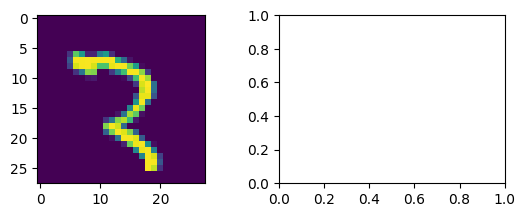

In [330]:
idx_sampled = 500
plt.subplot(2, 2, 1)
plt.imshow(x_train_sampled[idx_sampled])
plt.subplot(2, 2, 2)
x_pred[idx_sampled,:,:,5]